In [ ]:
!pip install -q kaggle
!pip install kaggle

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
dataset_path = '/content/drive/MyDrive/DataSetss/'

Importing the datasets


**IMAGE DATA**


Question1


In [86]:
from PIL import Image
import os

def is_image_file(path_inclined):
    try:
        with Image.open(path_inclined
      ) as img:
            return True
    except:
        return False

In [87]:
def count_image_files(directory_path):
    count = 0
    for i in os.listdir(directory_path):
        local_path=os.path.join(directory_path,i)
        if is_image_file(local_path):
            count+=1
    return count

In [88]:
def subfolder_images(f):
    subfolder_contents = os.listdir(f)
    image_counts = {sf: count_image_files(os.path.join(f, sf))
                    for sf in subfolder_contents if os.path.isdir(os.path.join(f, sf))}
    return image_counts

root_folder = '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA'
per_class_imagecount = subfolder_images(root_folder)
cc = count_image_files(root_folder)
print(per_class_imagecount)

{'CARS': 20, 'ELEPHANTS': 39, 'RANDOM': 20, 'AIRPLANE': 20, 'ROBOTS': 21}


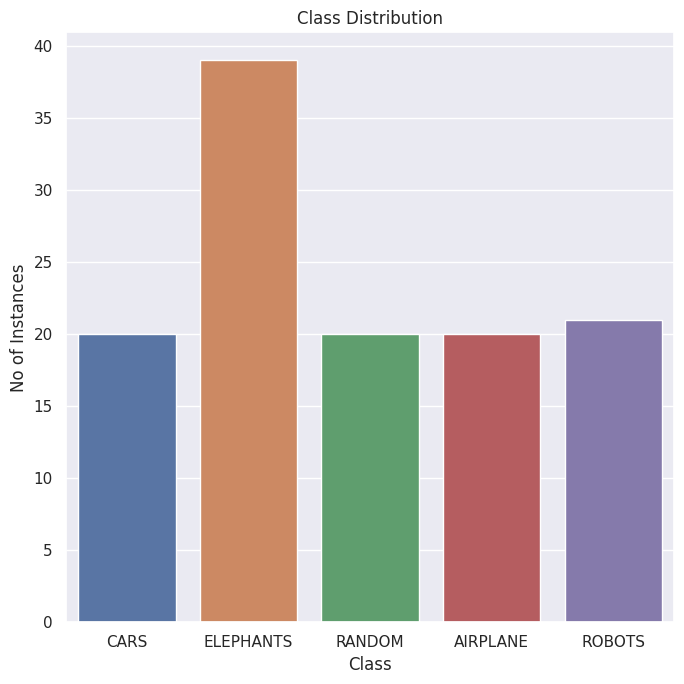

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(data_dict):
    sns.set(style="darkgrid")
    plt.figure(figsize=(7,7))
    sns.barplot(x=list(data_dict.keys()), y=list(data_dict.values()))
    plt.xlabel('Class')
    plt.ylabel('No of Instances')
    plt.title('Class Distribution')
    plt.tight_layout()
    plt.show()
plot_class_distribution(per_class_imagecount)

In [90]:
def find_min_and_max(dictionary):
    min_key = min(dictionary, key=dictionary.get)
    max_key = max(dictionary, key=dictionary.get)
    return min_key, max_key

def calculate_imbalance_ratio(min_count, max_count):
    ratio = min_count / max_count
    return ratio

class_counts = per_class_imagecount

minority_class, majority_class = find_min_and_max(class_counts)
minority_count, majority_count = class_counts[minority_class], class_counts[majority_class]
imbalance_ratio = calculate_imbalance_ratio(minority_count, majority_count)

print(f"Class Information:\n"
      f"  Minority Class: {minority_class}\n"
      f"  Majority Class: {majority_class}\n"
      f"  Imbalance Ratio: {imbalance_ratio:.2f}")



Class Information:
  Minority Class: CARS
  Majority Class: ELEPHANTS
  Imbalance Ratio: 0.51


**Since we can see that imabalance ratio exceeds and there is a majority class data difference we shall say the dataset is imbalanced.We can see from Elephant and other classes there is a big gap from the bar plot this also explains the imbalance.**

To balance it we can do either

Oversampling/
Undersampling
Increased number of instances in imbalanced or majority classes


Question 2 Question 3


In [91]:
import os
import time
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [92]:
def custom_random():
    seed = int(time.time() * 1000000)
    a = 1667922
    c = 1013904555
    m = 2**24
    def generator():
        nonlocal seed
        seed = (a*seed+c)%m
        return seed/m
    return generator

In [93]:
def get_files_with_subfolders(folder_path):
    fps=[]
    for root, _, files in os.walk(folder_path):
        for filename in files:
            fp = os.path.join(root, filename)
            subfolder_name = os.path.basename(root)
            fps.append((fp, subfolder_name))
    return fps

In [94]:
def create_histogram(path_and_class):
    image_path = path_and_class[0]
    image_class = path_and_class[1]
    image = Image.open(image_path)
    image = image.convert("L")
    histogram = image.histogram()

    plt.figure()
    plt.tight_layout()
    plt.title(f'image class: {image_class}')
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.hist(histogram, bins=256, range=(0,256), color='red', alpha=0.5)
    plt.show()

def mean_and_variance(path_list):
    mean = []
    variance = []
    for path in path_list:
        image = Image.open(path)
        images_array = np.array(image)
        mean.append(np.mean(images_array))
    return np.mean(np.array(mean)), np.var(np.array(mean))

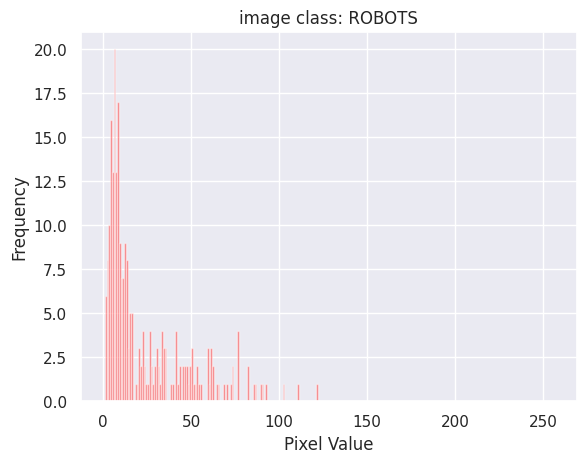

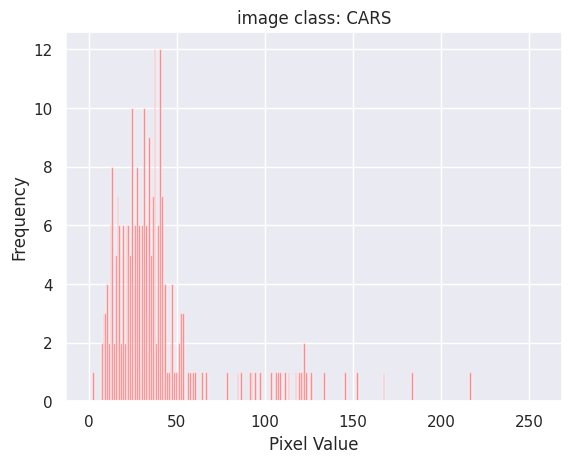

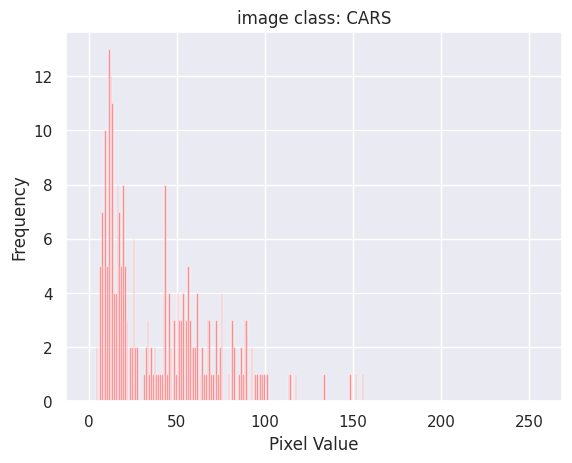

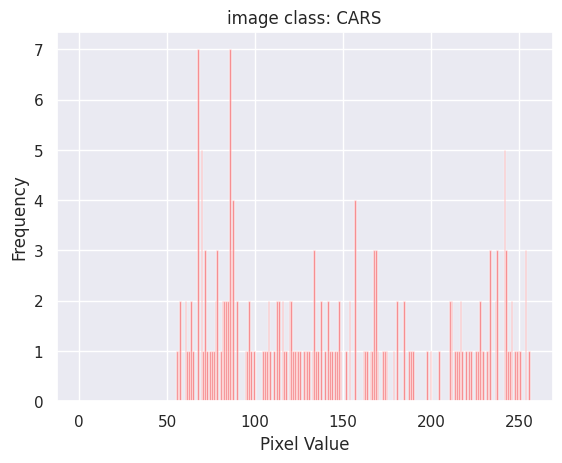

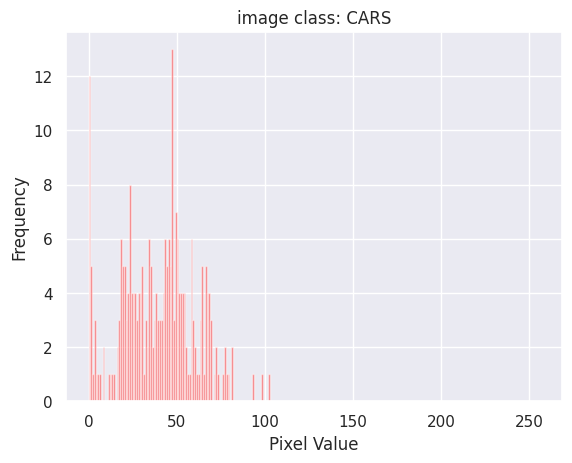

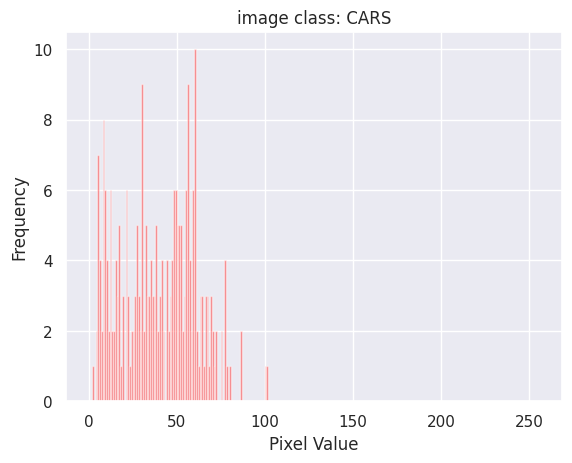

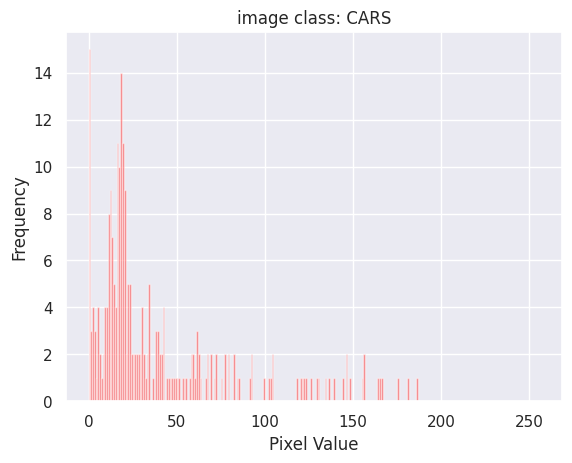

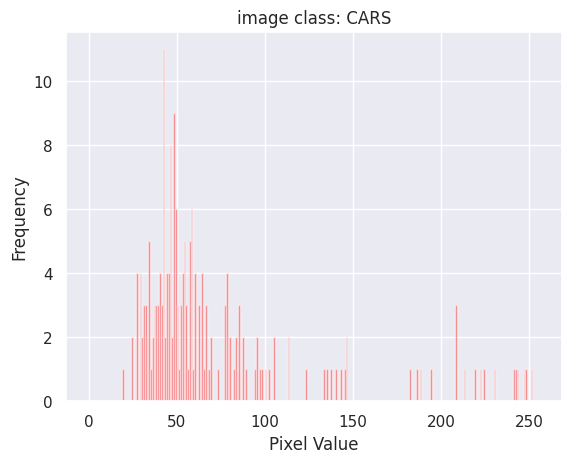

{'ROBOTS': ['/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (15).jpeg', '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (6).jpeg', '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (14).jpeg', '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (5).jpeg', '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (20).jpeg', '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (19).jpeg', '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (8).jpeg', '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (1).jpeg', '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (13).jpeg', '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (18).jpeg', '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (4).jpeg', '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA/ROBOTS/images (11).jpeg', '/content

In [95]:
top_folder = '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA'
file_paths_subfolders_list = get_files_with_subfolders(top_folder)
custom_random_gen = custom_random()

shuffled_list = file_paths_subfolders_list.copy()
for i in range(len(shuffled_list) - 1, 0, -1):
    j = int(custom_random_gen() * (i + 1))
    shuffled_list[i], shuffled_list[j] = shuffled_list[j], shuffled_list[i]
random_values = shuffled_list[:8]

for value in random_values:
    create_histogram(value)

image_dict = {}
for item in shuffled_list:
    image_path = item[0]
    ic = item[1]
    if ic not in image_dict:
        image_dict[ic] = []
    image_dict[ic].append(image_path)

print(image_dict)

for key in image_dict:
    mean, variance = mean_and_variance(image_dict[key])
    print(f'mean for class {key} is {mean}')
    print(f'variance for class {key} is {variance}')
    print("\n")

path = shuffled_list[0][0]
image = Image.open(path)
images_array = np.array(image)
print(np.mean(images_array))
print(images_array)

Some observations are
Mean values of pixels define the quality of images in terms of brightness.Ofcourse,means value is directly proportional to its brightness.Variance gives us the consisitency in the daatset in terms of intensity.With variance we can measure the spread of pixels around the mean.

Question 4


In [96]:
import os
import time
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import zscore

In [97]:
def custom_random():
    seed = int(time.time() * 1000000)
    a = 1667922
    c = 1013904555
    m = 2**24
    def generator():
        nonlocal seed
        seed = (a * seed + c) % m
        return seed / m
    return generator

In [98]:
def get_files_with_subfolders(folder_path):
    fps=[]
    for root, _, files in os.walk(folder_path):
        for filename in files:
            fp = os.path.join(root, filename)
            subfolder_name = os.path.basename(root)
            fps.append((fp, subfolder_name))
    return fps

In [99]:
import os
import time
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import zscore

In [100]:
def display_image(image_array, cmap='viridis', title=None, kk=None):
    if kk is None:
        plt.figure(figsize=(5,5))
        plt.imshow(image_array, cmap=cmap)
        if title:
            plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        kk.imshow(image_array, cmap=cmap)
        if title:
            kk.set_title(title)
        kk.axis('off')



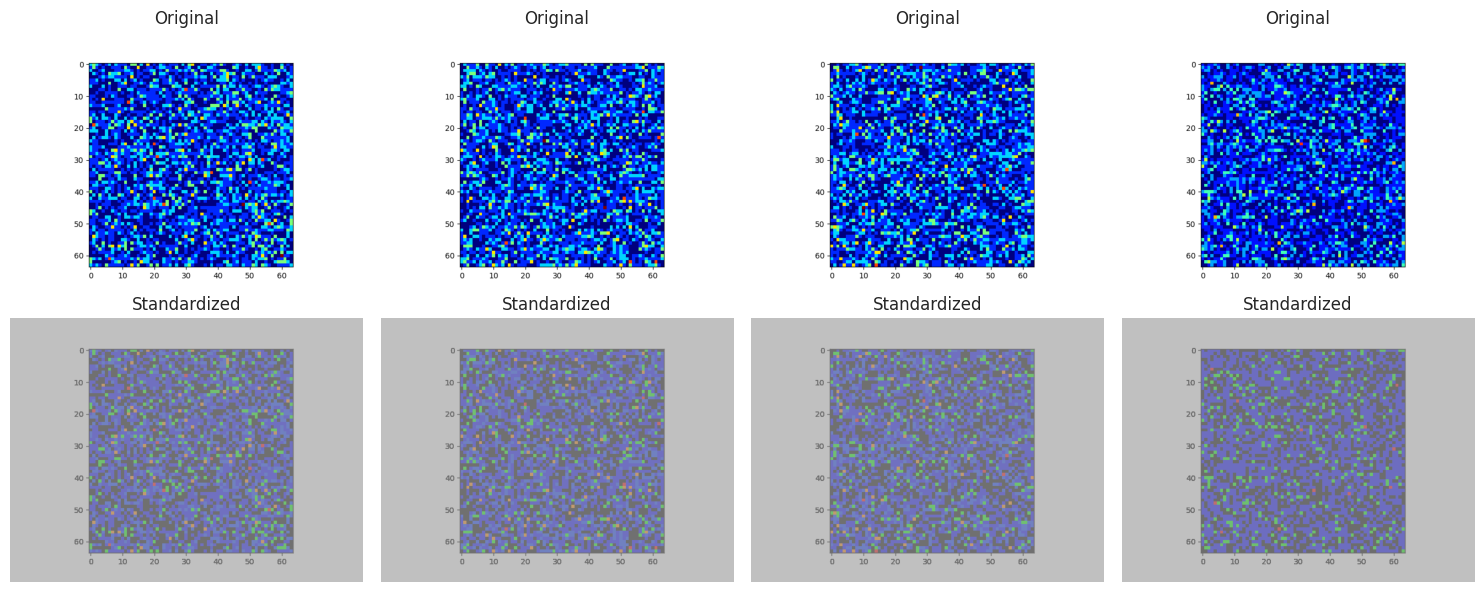

In [101]:

def standardize_image(image_array):
    mean = np.mean(image_array)
    std = np.std(image_array)
    si = (image_array-mean)/std
    return si

top_folder = '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA'

fps_list = get_files_with_subfolders(top_folder)
custom_random_gen = custom_random()
shuffled_list = fps_list.copy()
for i in range(len(shuffled_list) -1, 0, -1):
    j = int(custom_random_gen() * (i + 1))
    shuffled_list[i], shuffled_list[j] = shuffled_list[j], shuffled_list[i]

image_dict = {}
for item in shuffled_list:
    image_path = item[0]
    ic = item[1]
    if ic not in image_dict:
        image_dict[ic] = []
    image_dict[ic].append(image_path)

random.shuffle(image_dict["RANDOM"])
random_values = image_dict["RANDOM"][:4]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))

for idx, value in enumerate(random_values):
    image = Image.open(value)
    image_array = np.array(image, dtype=np.float32)

    si_array = standardize_image(image_array)

    kk = axes[0, idx]
    display_image(image_array / 255, title="Original", kk=kk)
    kk = axes[1, idx]
    display_image(si_array, title="Standardized", kk=kk)
plt.tight_layout()
plt.show()

Orginial images are unchanged images,ranging pixel values from black to white (0-255) for 'L" images,while standardized images are transformed to have 0 mean and 1 Sd.
Observations

On Standardizing images it doesnt distort the inner details of the images.Inner strcuture is same.Also the visual imapact seems consistent.


In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image,ImageOps
import librosa
import soundfile as sf
import string
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties
import time

In [103]:
def display_image(image_array, cmap='viridis', title=None):
    plt.figure(figsize=(5,5))
    plt.imshow(image_array, cmap=cmap)
    if title:
        plt.title(title)
    plt.show()

def rotation(image_path, rfd):
    original_image = Image.open(image_path)
    rotation_angle = rfd() * 360 - 180

    rotated_image = original_image.rotate(rotation_angle, resample=Image.BICUBIC)
    display_image(rotated_image, title="ROTATED")

def custom_shuffle(lst, rfd):
    n = len(lst)
    for i in range(n - 1, 0, -1):
        j = int(rfd() * (i + 1))
        lst[i],lst[j] = lst[j],lst[i]

def custom_random_shuffle(lst):
    custom_rand = custom_random()
    custom_shuffle(lst, custom_rand)

def crop(image_path, rfd):
    image = Image.open(image_path)
    iw, ih = image.size
    crop_left = int(rfd() * (iw -5))
    crop_right = int(rfd() * (iw - crop_left - 5)) + crop_left + 5
    crop_top = int(rfd() * (ih -5))
    crop_bottom = int(rfd() * (ih - crop_top - 5)) + crop_top +5
    cropped_image = image.crop((crop_left, crop_top, crop_right, crop_bottom))
    display_image(cropped_image, title="CROPPED")

def scale(image_path, rfd, resample=None):
    image = Image.open(image_path)
    scale_factor = 0.5 + rfd()
    scaled_width = int(image.width * scale_factor)
    scaled_height = int(image.height * scale_factor)

    scaled_image = image.resize((scaled_width, scaled_height))
    print(display_image(scaled_image, title="SCALED"))



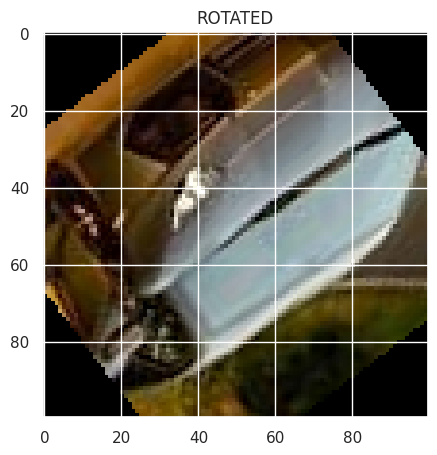

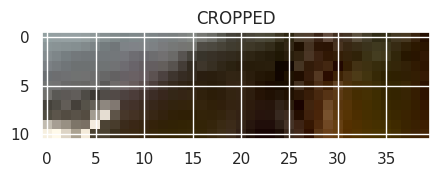

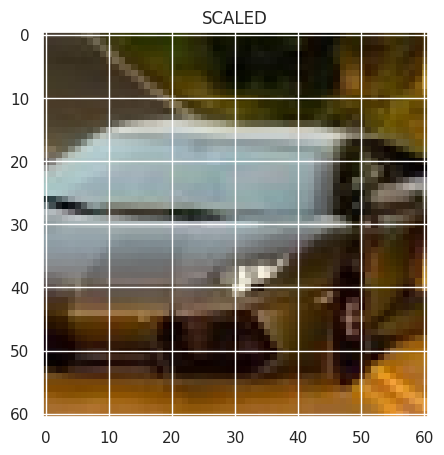

None


In [106]:

top_folder = '/content/drive/MyDrive/DataSetss/IMAGE_DATA/IMAGE_DATA'

file_paths_subfolders_list = get_files_with_subfolders(top_folder)
crg = custom_random()

shuffled_list = file_paths_subfolders_list.copy()
for i in range(len(shuffled_list) - 1, 0, -1):
    j = int(crg() * (i + 1))
    shuffled_list[i], shuffled_list[j] = shuffled_list[j], shuffled_list[i]

image_dict = {}
for item in shuffled_list:
    image_path = item[0]
    image_class = item[1]
    if image_class not in image_dict:
        image_dict[image_class] = []
    image_dict[image_class].append(image_path)


custom_random_shuffle(image_dict["CARS"])
random_values = image_dict["CARS"][:1]

crg = custom_random()

for value in random_values:
    rotation(value, crg)
    crop(value, crg)
    scale(value, crg)

**Audio Data**

In [107]:
import os
import librosa
import numpy as np
dataset_path = '/content/drive/MyDrive/DataSetss/AUDIO_DATA/AUDIO_DATA'

Ques1


In [108]:
length_dict = {}
folders = os.listdir(dataset_path)
paths_lists = []
for folder in folders:
    jojo = []
    path = os.path.join(dataset_path, folder)
    files = os.listdir(path)
    for aud_file in files:
        p = os.path.join(path, aud_file)
        paths_lists.append(p)
        audio,sr = librosa.load(p, sr=None)
        lens = len(audio)/sr
        jojo.append(lens)
    means = np.mean(jojo)
    length_dict[folder] = means
print(length_dict)

{'CLASS 3': 49.532238600127556, 'CLASS 4': 2.1690999999999994, 'CLASS 2': 1.88745625, 'CLASS 1': 21.9732, 'CLASS 5': 2.3024125}


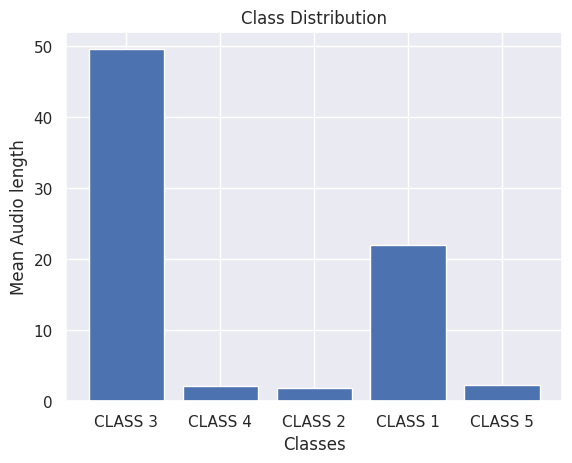

In [109]:
plt.bar(length_dict.keys(),length_dict.values())
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Mean Audio length')
plt.show()

We can clearly see class 3 and class 1 have huge data imbalanced.as per the bar plot.We can do resampling or oversamplping for that instance of the class.


Mean audio are above in dict format in seconds.

Ques2


Ques 3


In [110]:
dataset_paths = '/content/drive/MyDrive/DataSetss/AUDIO_DATA/AUDIO_DATA'

In [111]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import lfilter
import time

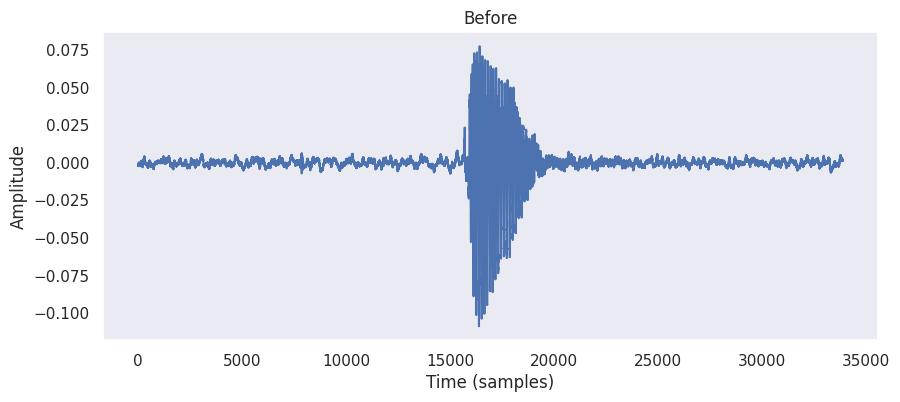

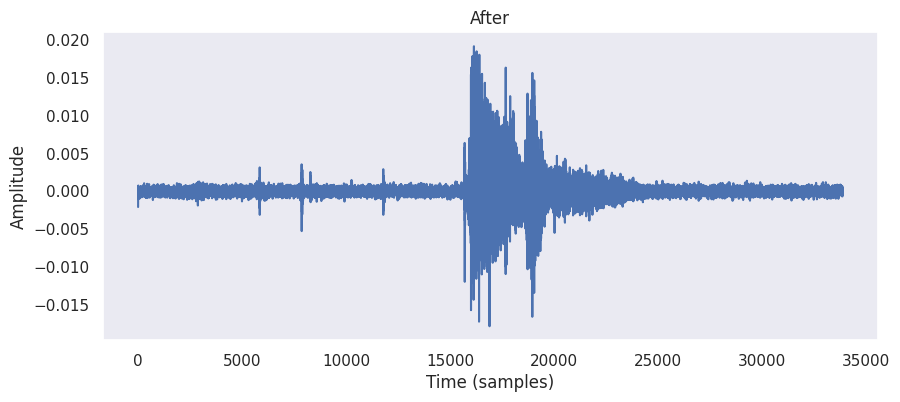

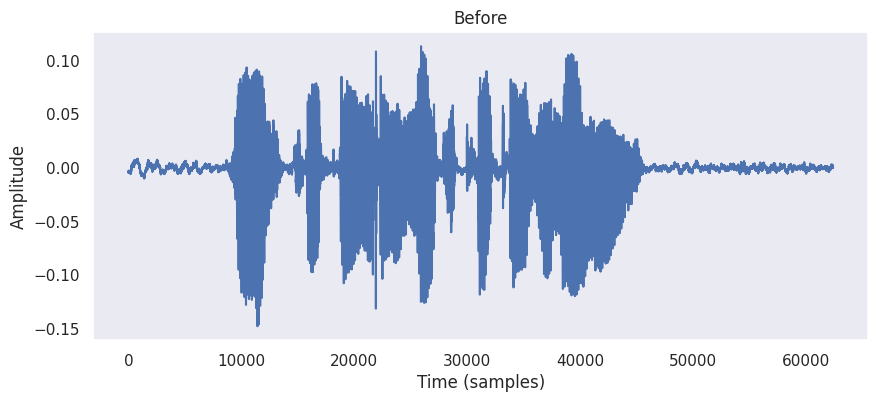

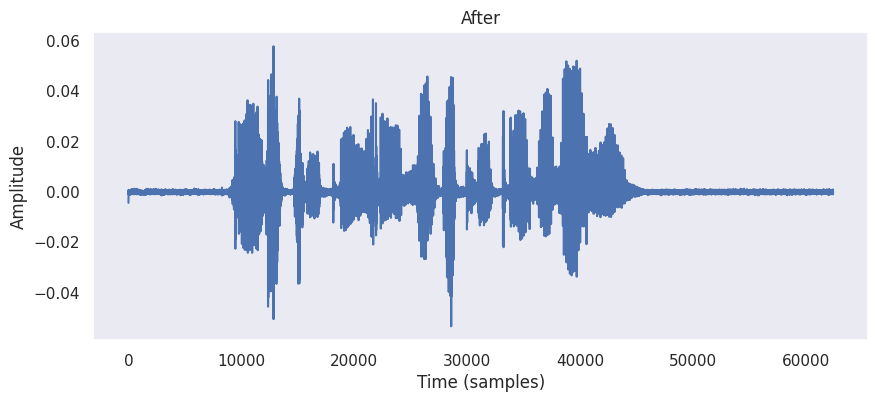

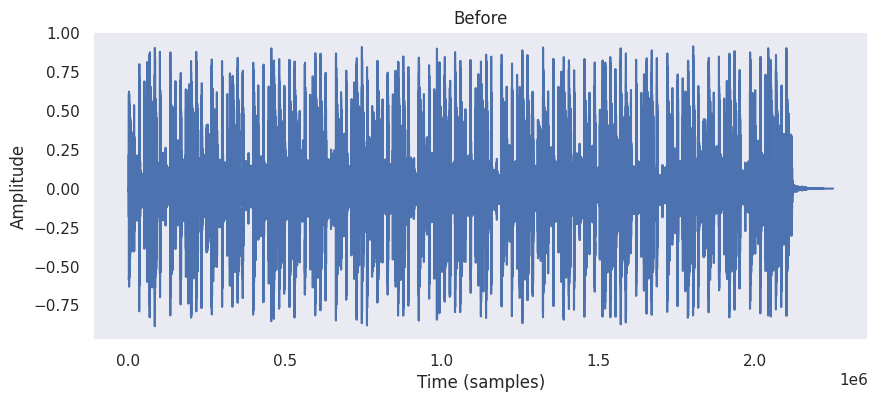

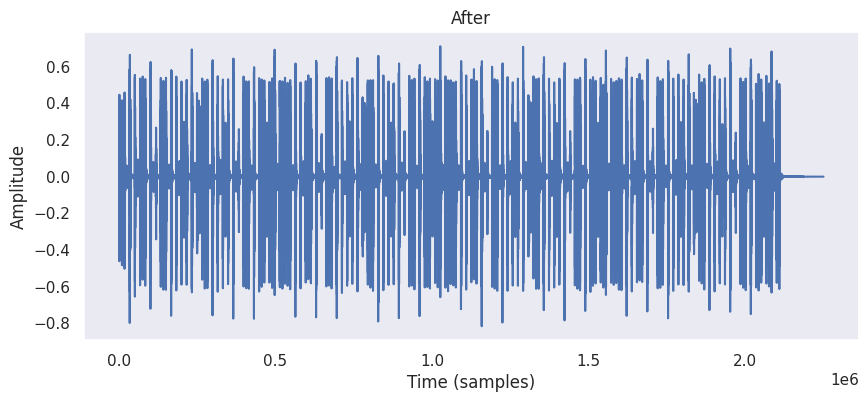

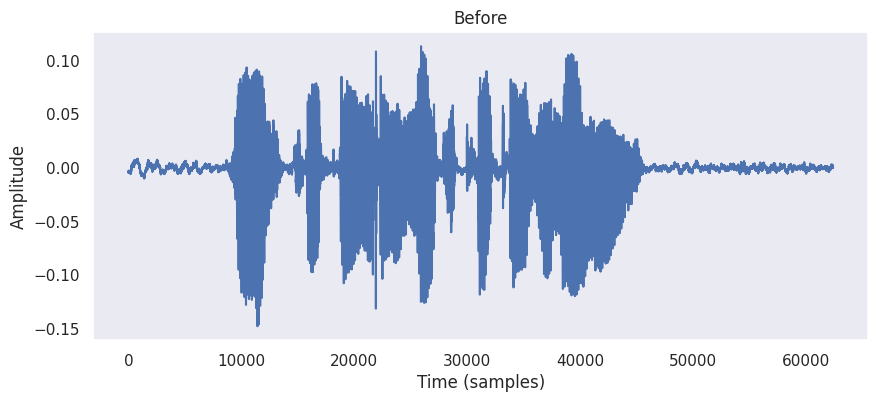

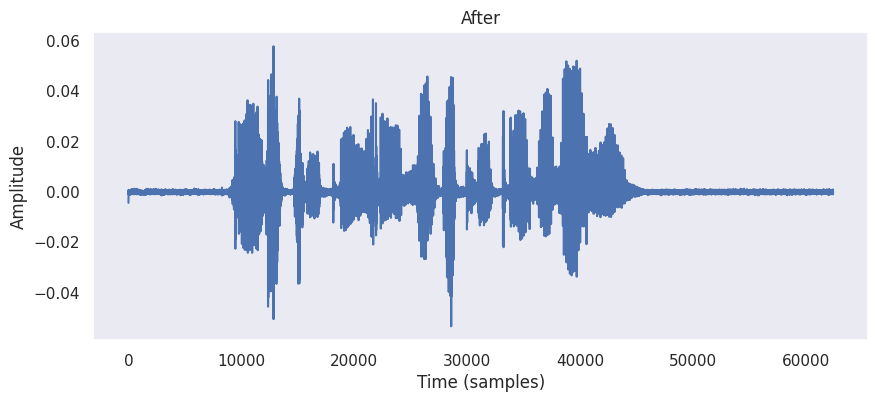

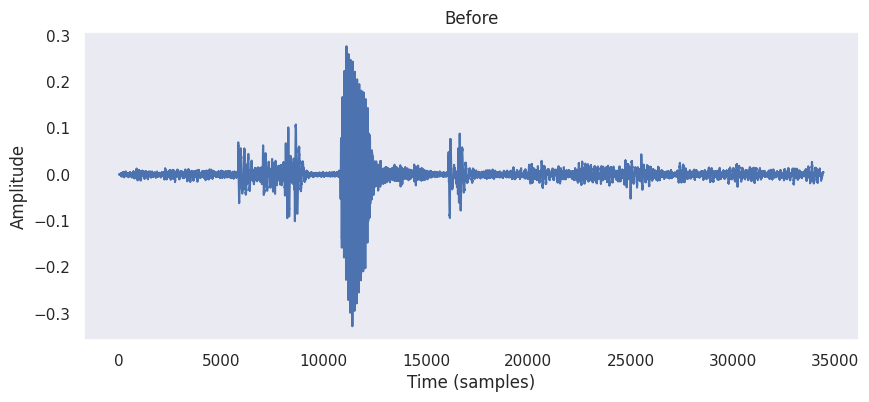

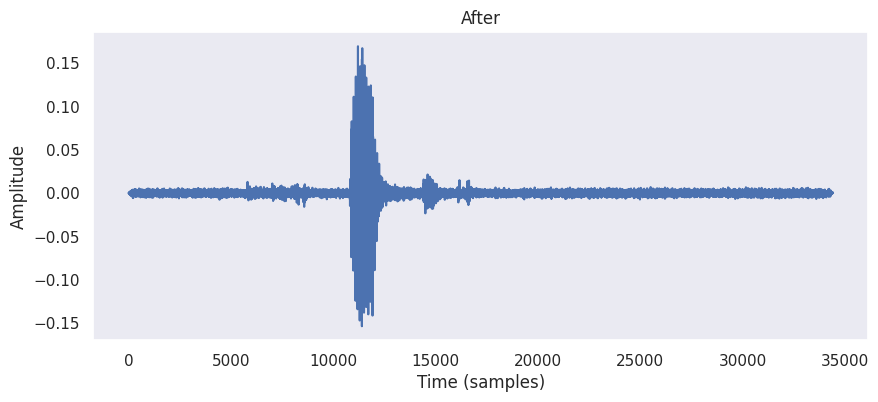

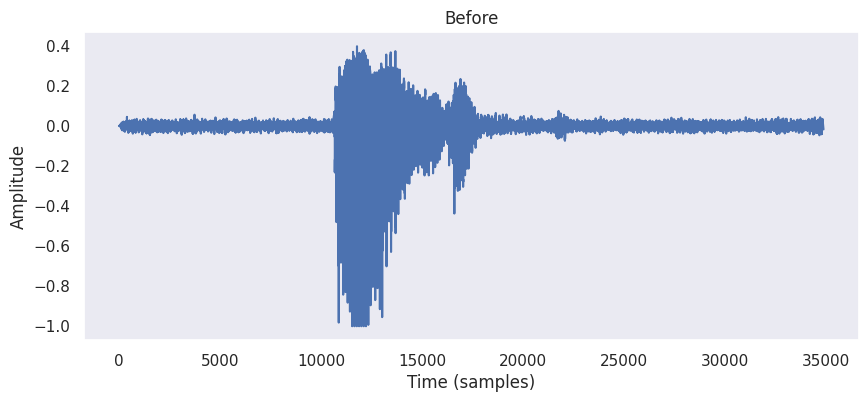

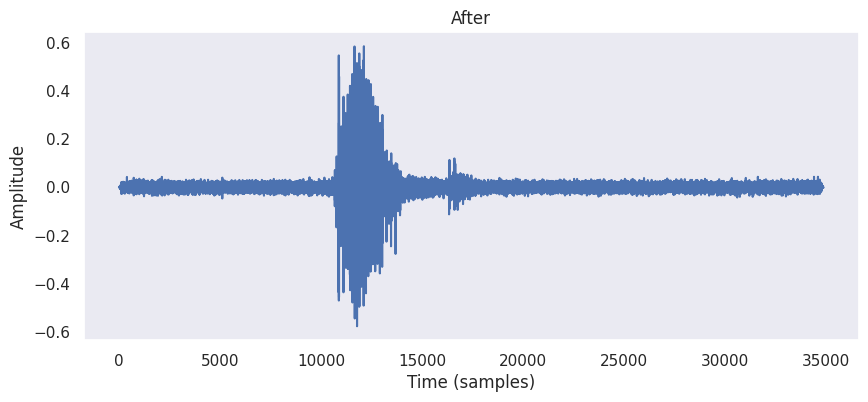

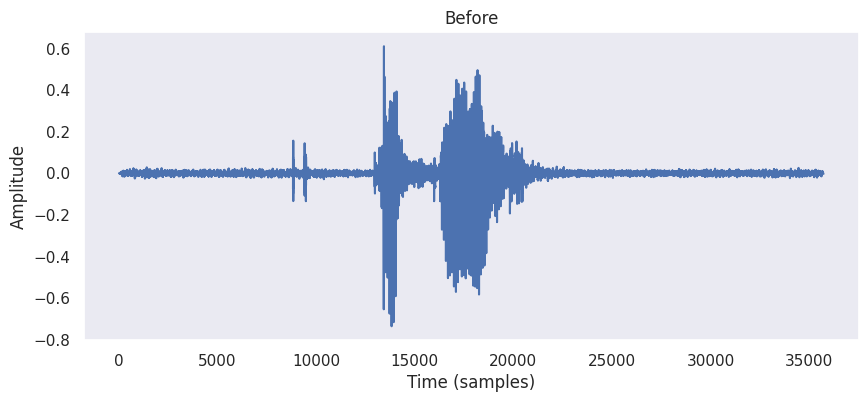

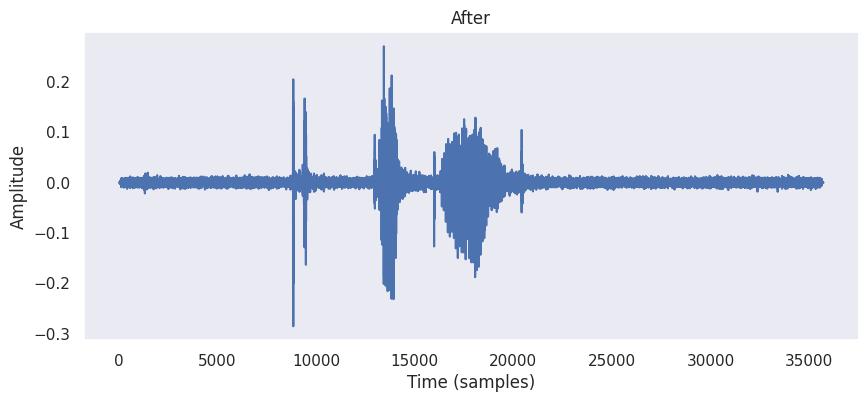

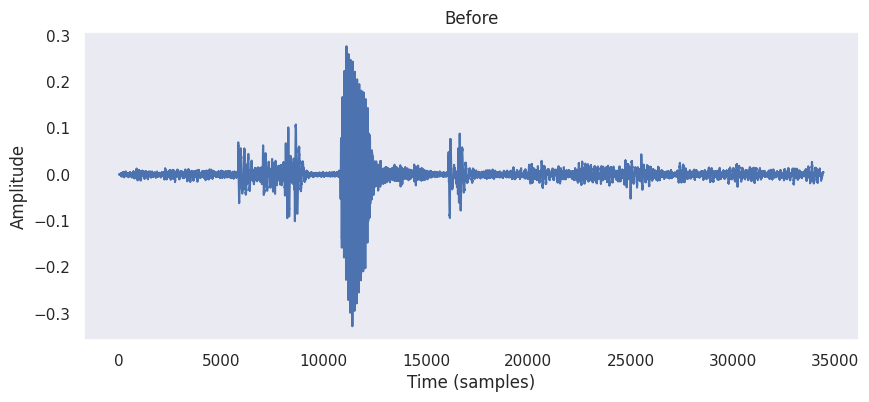

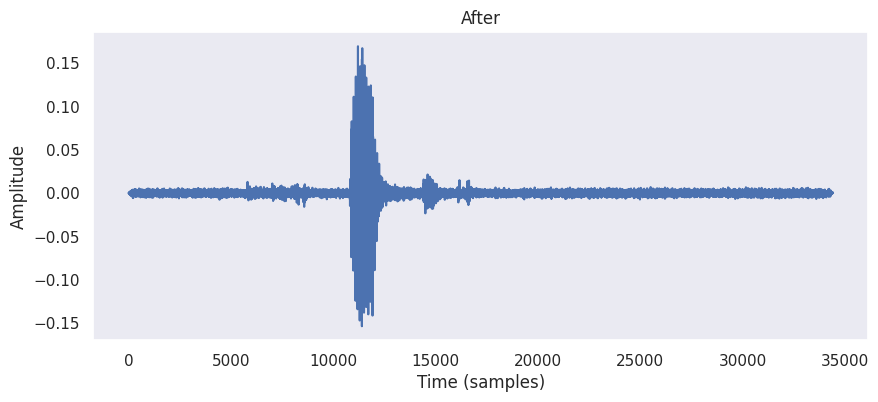

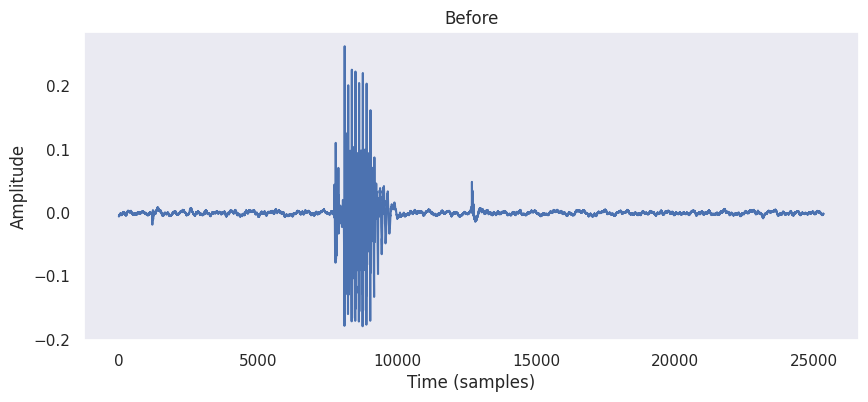

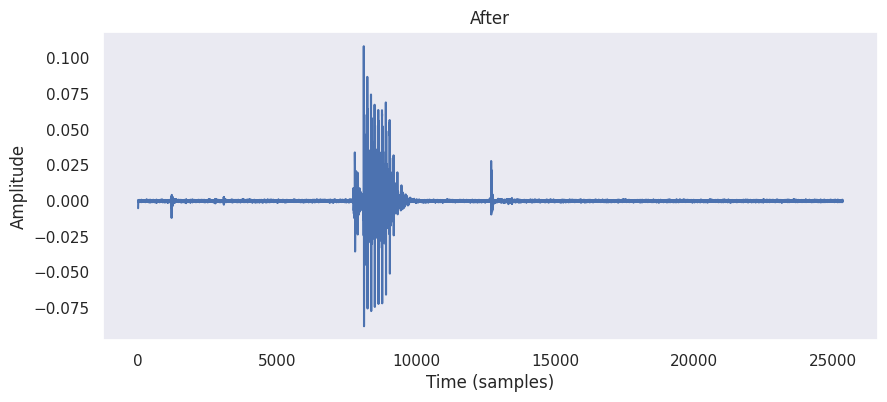

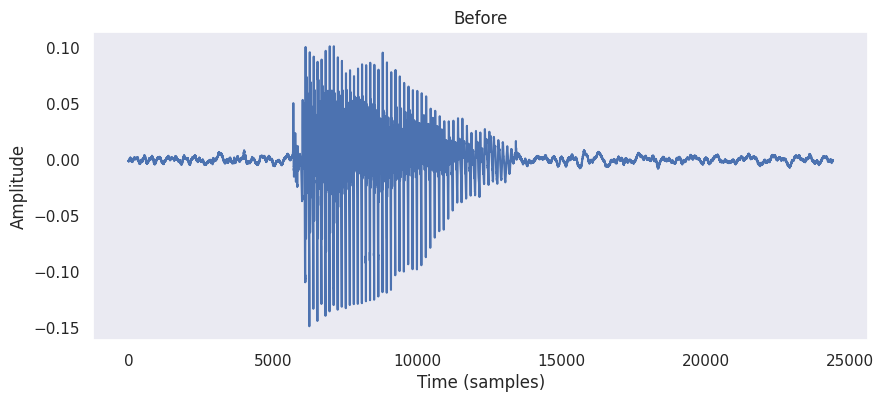

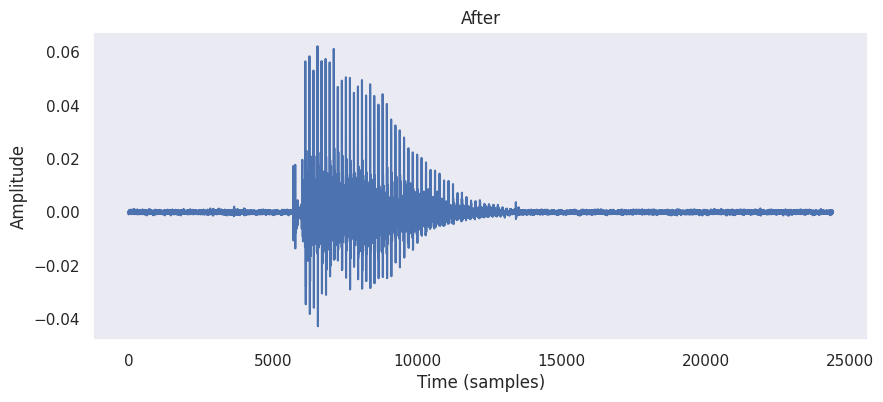

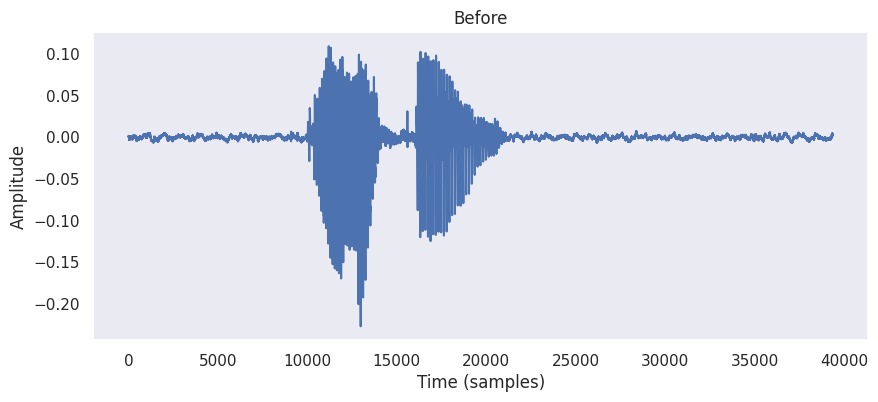

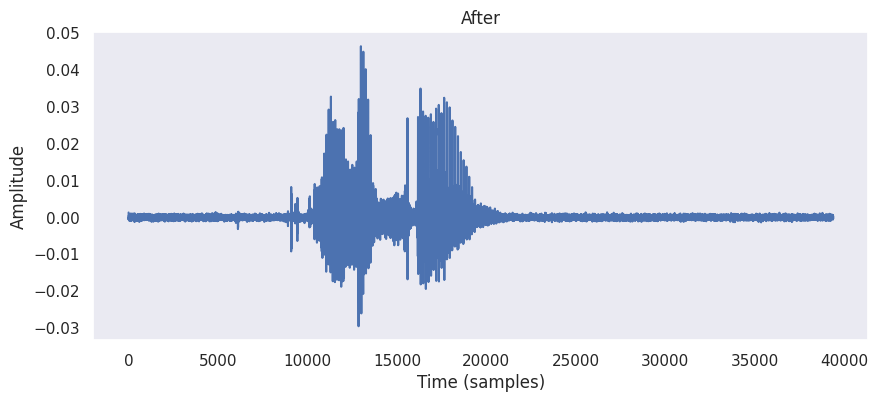

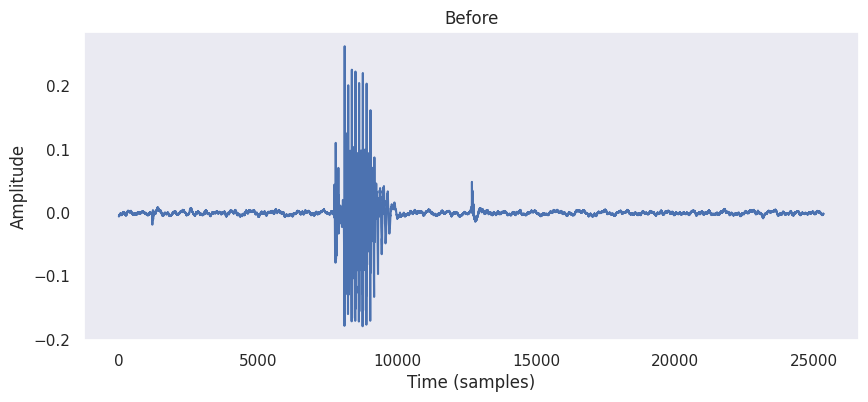

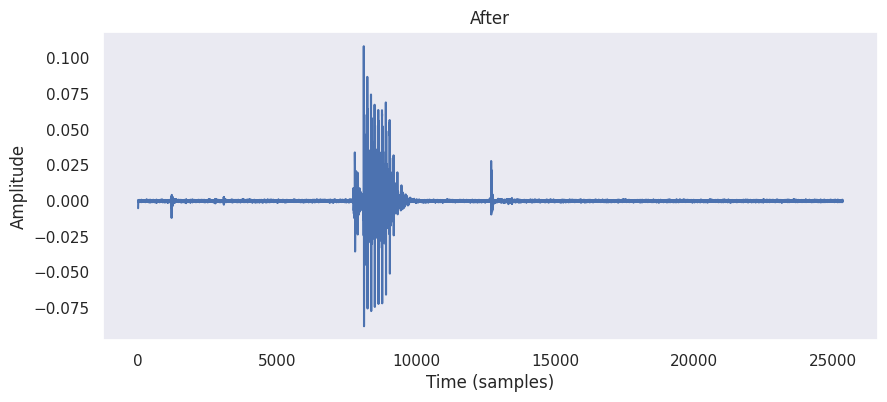

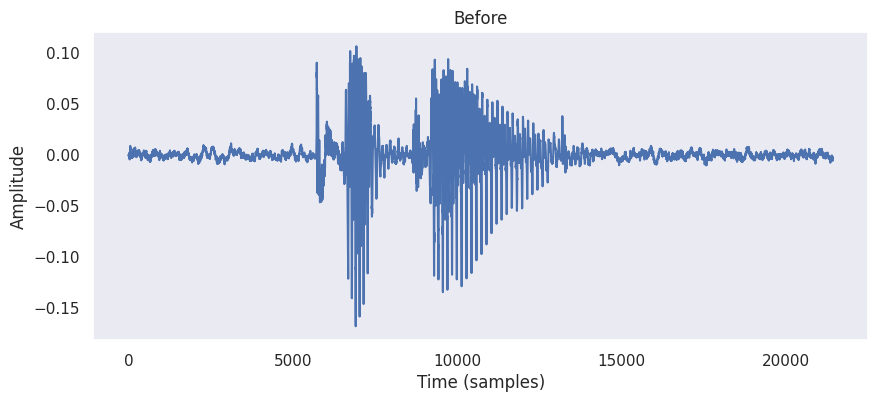

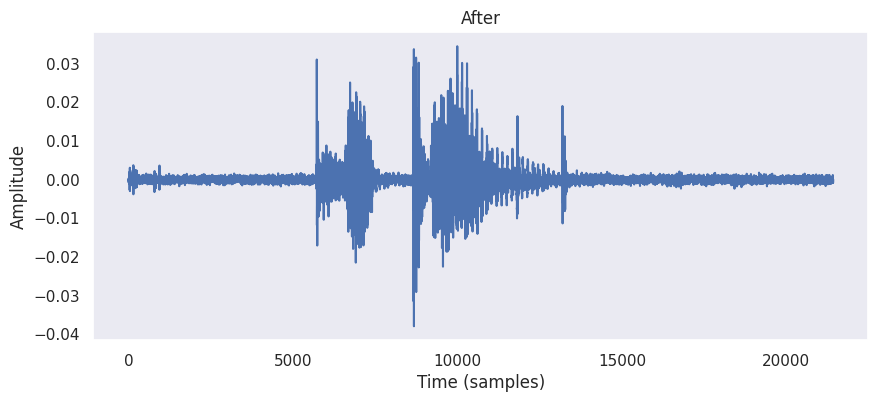

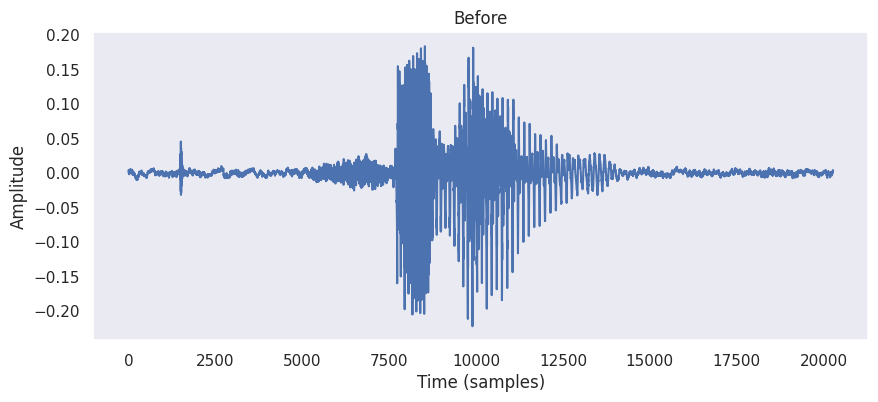

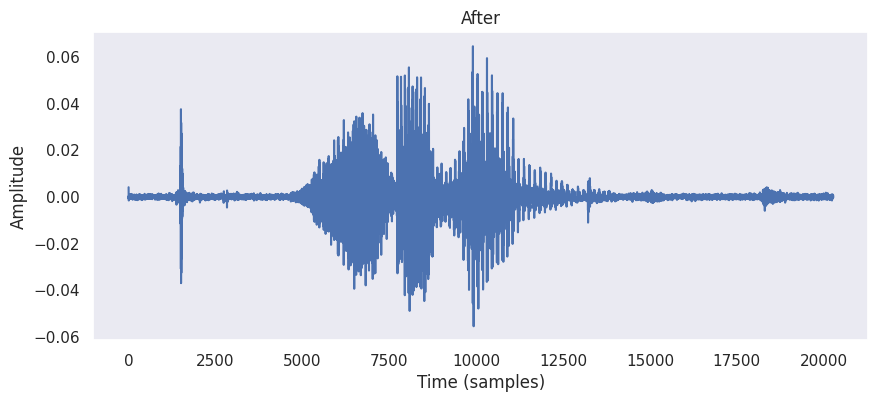

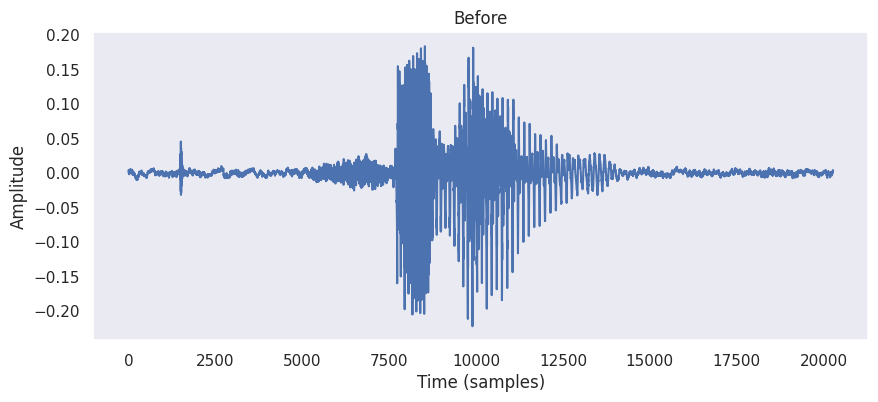

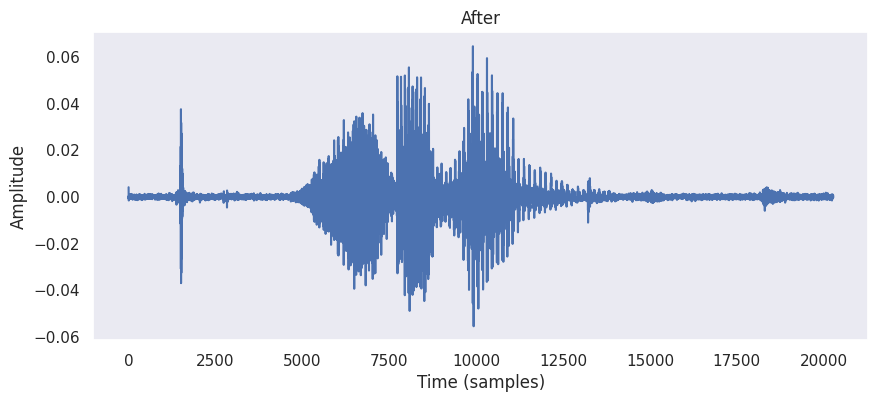

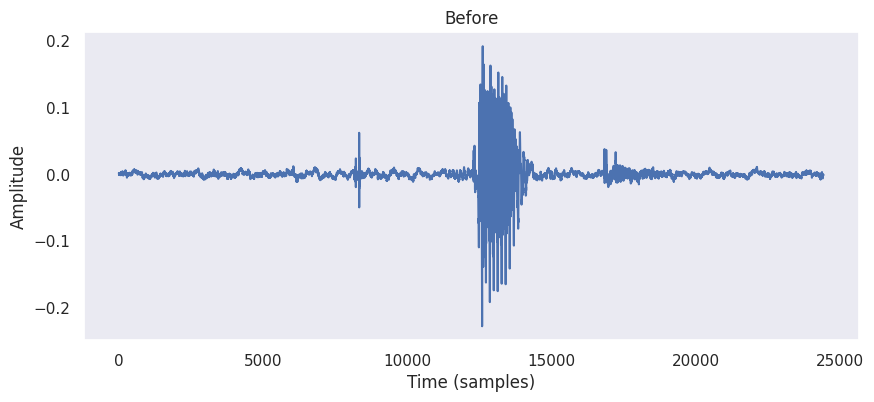

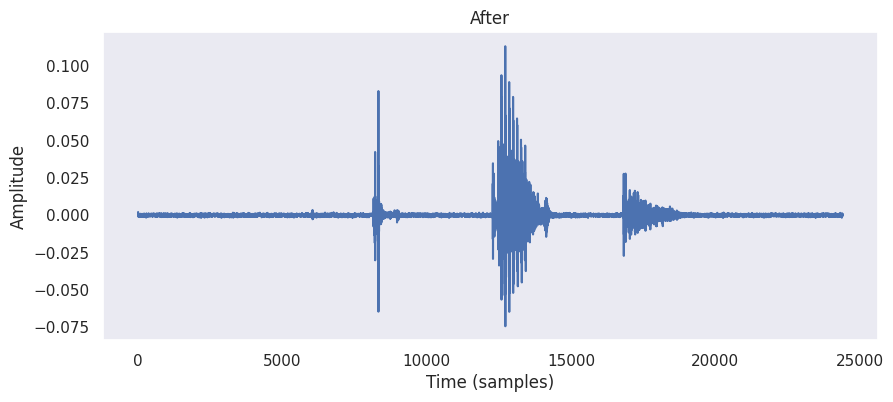

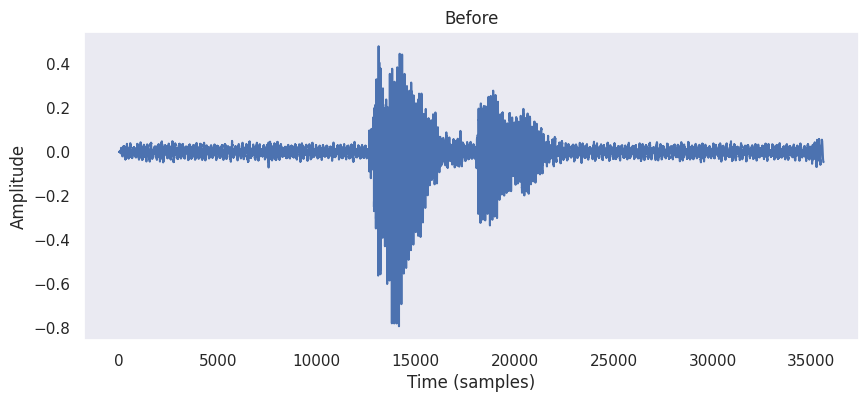

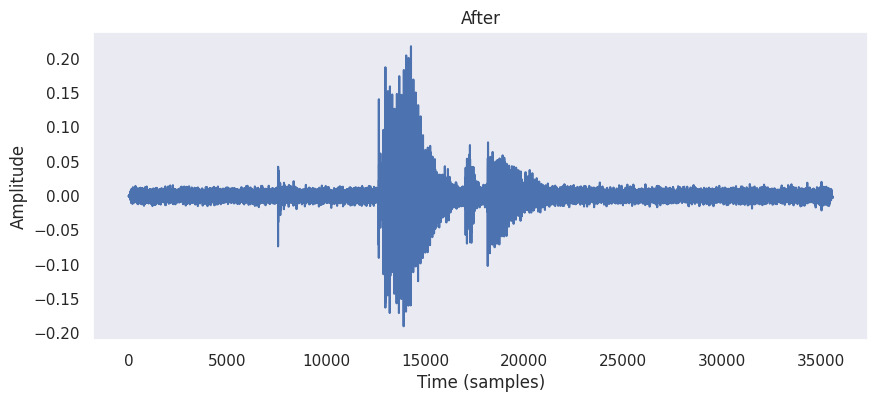

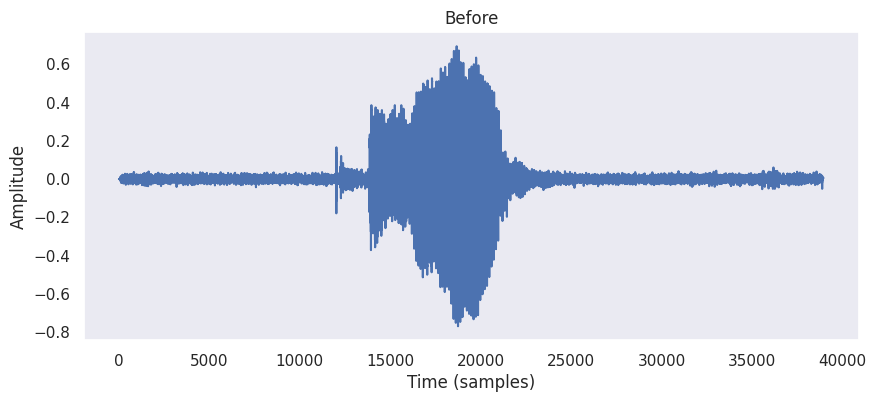

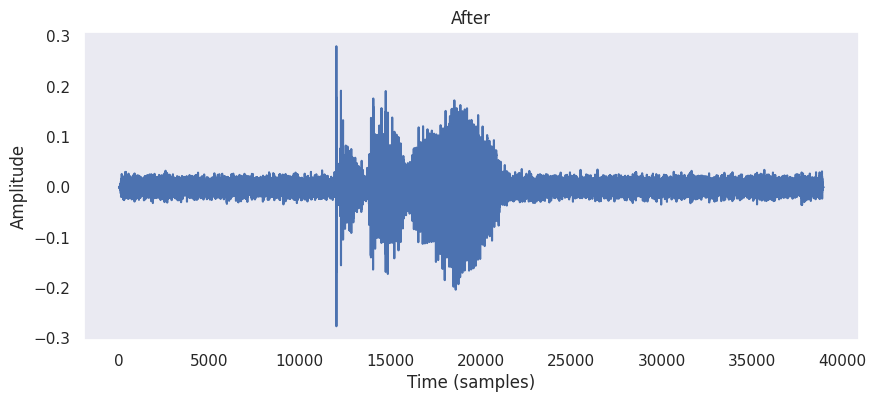

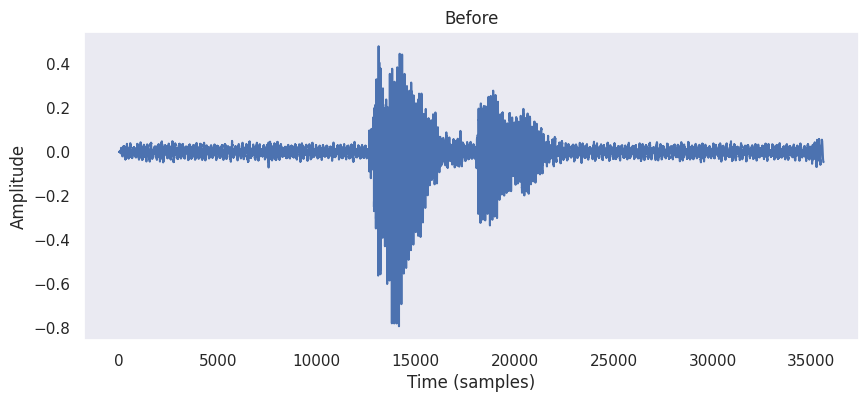

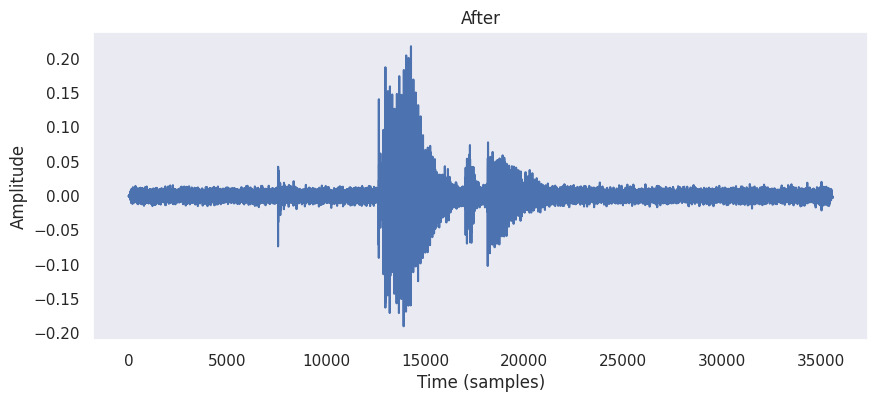

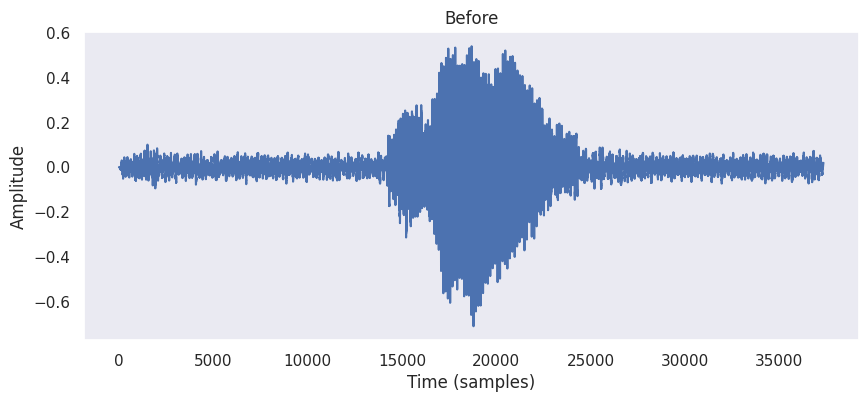

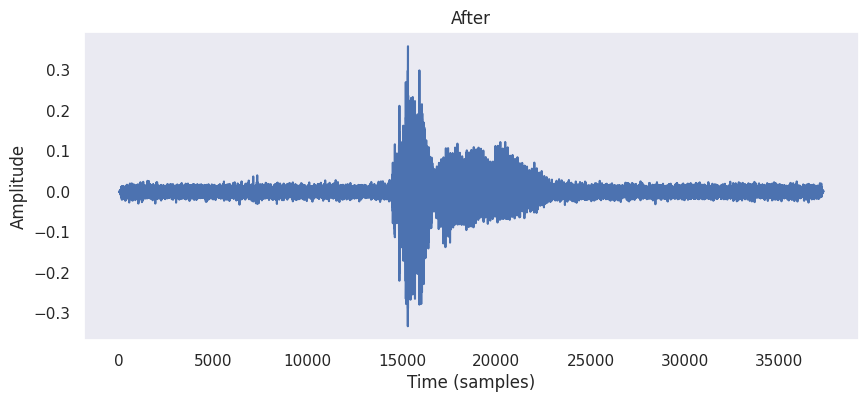

In [77]:
xfs = os.listdir(dataset_paths)
custom_random_gen = custom_random()

for xf in xfs:
    class_path = os.path.join(dataset_paths, xf)
    audio_files = os.listdir(class_path)
    random_sample_indices = [int(custom_random_gen() * len(audio_files)) for _ in range(4)]
    random_sample_files = [audio_files[i] for i in random_sample_indices]

    for audio_file in random_sample_files:
        ap = os.path.join(class_path, audio_file)

        signal, sampling_rate = librosa.load(ap, sr=None)
        emphasised_signal = pre_emphasis(signal)

        plot_time_domain(signal, title='Before')
        plot_time_domain(emphasised_signal, title='After')


Pre emphases basically pushes high freq comp of audio signals.

Ques 4

Ques 5


TEXT DATA


In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/DataSetss/TEXT_DATA/TEXT_DATA/Hindi_English_parallel.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,english_sentence,hindi_sentence
0,0,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,1,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,2,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,3,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,4,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


1. Find average text length of English and Hindi corpus.

In [ ]:
df['eng_length'] = df['english_sentence'].astype(str).apply(len)

average_eng_length = df['eng_length'].mean()
df['hindi_length'] = df['hindi_sentence'].astype(str).apply(len)

average_hindi_length = df['hindi_length'].mean()

print(f'Average length in English corpus: {average_eng_length}')
print(f'Average length in Hindi corpus: {average_hindi_length}')

Average length in English corpus: 89.6061844757497
Average length in Hindi corpus: 86.28161773813947


2. Randomly select 20 parallel texts and remove punctuations

In [ ]:

random.seed(42069)
random_indices = random.sample(range(len(df)), 20)
selected_rows = df.loc[random_indices]

def remove_special_characters(text):
    special_characters = "!@#$%^&*()_+{}[]|\\;:'\"<>,.?/~`।"
    cleaned_text = ''.join(str(char) for char in text if char not in special_characters)
    return cleaned_text

selected_rows['cleaned_english_text'] = selected_rows['english_sentence'].apply(remove_special_characters)
selected_rows['cleaned_hindi_text'] = selected_rows['hindi_sentence'].apply(remove_special_characters)


for index, row in selected_rows.iterrows():
    print(f"Original English Text: {row['english_sentence']}")
    print(f"Cleaned English Text: {row['cleaned_english_text']}\n")

    print(f"Original Hindi Text: {row['hindi_sentence']}")
    print(f"Cleaned Hindi Text: {row['cleaned_hindi_text']}\n")

Original English Text: Lashkar-e-Toiba , Harkat-ul-Mujahideen , Al Faran , Jaish-e-Mohammed .
Cleaned English Text: Lashkar-e-Toiba  Harkat-ul-Mujahideen  Al Faran  Jaish-e-Mohammed 

Original Hindi Text: जरा गौर करेंः लश्कर-ए-तोइबा , हरकत-उल-मुज़ाहिदीन , अल फरान , जैश-ए-मोहमद वगैरह-वगैरह .
Cleaned Hindi Text: जरा गौर करेंः लश्कर-ए-तोइबा  हरकत-उल-मुज़ाहिदीन  अल फरान  जैश-ए-मोहमद वगैरह-वगैरह 

Original English Text: Three big fairs are held in a year on Vaishakh Poornima , Shravan month 's amavasya , and Ekadashi of Bhadrapad .
Cleaned English Text: Three big fairs are held in a year on Vaishakh Poornima  Shravan month s amavasya  and Ekadashi of Bhadrapad 

Original Hindi Text: वर्ष में तीन बड़े मेले वैशाख पूर्णिमा श्रावण मास की अमावस्या और भाद्रपद की एकादशी को लगते हैं |
Cleaned Hindi Text: वर्ष में तीन बड़े मेले वैशाख पूर्णिमा श्रावण मास की अमावस्या और भाद्रपद की एकादशी को लगते हैं 

Original English Text: Group work
Cleaned English Text: Group work

Original Hindi Text: सामूहिक कार्

Randomly select 50 parallel texts and make dictionary for both english and hindi corpus.

In [ ]:

random_indices = random.sample(range(len(df)), 50)
selected_rows = df.loc[random_indices]


selected_rows['cleaned_english_text'] = selected_rows['english_sentence'].apply(remove_special_characters)
selected_rows['cleaned_hindi_text'] = selected_rows['hindi_sentence'].apply(remove_special_characters)

def num_assign(words):
    unique_numbers = {}
    counter = 1
    for word in words:
        if word not in unique_numbers:
            unique_numbers[word] = counter
            counter += 1
    return unique_numbers

english_words = [word for sentence in selected_rows['cleaned_english_text'] for word in sentence.lower().split()]
hindi_words = [word for sentence in selected_rows['cleaned_hindi_text'] for word in sentence.lower().split()]

eng_dict = num_assign(english_words)
hindi_dict = num_assign(hindi_words)

print(eng_dict)

{'i': 1, 'was': 2, 'surprised': 3, 'how': 4, 'eight': 5, 'people': 6, 'with': 7, '9': 8, 'mm': 9, 'guns': 10, 'failed': 11, 'to': 12, 'kill': 13, 'kadam': 14, '-lrb-': 15, 'rajan': 16, 's': 17, 'alias': 18, '-rrb-': 19, 'when': 20, 'they': 21, 'could': 22, 'd': 23, 'souza': 24, 'verma': 25, '”': 26, 'in': 27, 'the': 28, 'first': 29, 'half': 30, 'of': 31, '13th': 32, 'century': 33, 'clan': 34, 'named': 35, 'sanskrit': 36, 'word': 37, 'mall': 38, 'ka': 39, 'thar': 40, 'starts': 41, 'rising': 42, 'by': 43, 'mixing': 44, 'juice': 45, 'salad': 46, 'leaves': 47, 'rose': 48, 'oil': 49, 'and': 50, 'massaging': 51, 'on': 52, 'head': 53, 'one': 54, 'gets': 55, 'better': 56, 'sleep': 57, 'relief': 58, 'from': 59, 'headache': 60, 'can': 61, 'also': 62, 'be': 63, 'got': 64, 'am': 65, 'five': 66, 'times': 67, 'more': 68, 'likely': 69, 'live': 70, 'within': 71, 'walking': 72, 'distance': 73, 'nor': 74, 'have': 75, 'had': 76, 'cold': 77, 'change': 78, 'season': 79, 'at': 80, 'news': 81, 'desk': 82, 'a

Find 10 most occuring words and plot there histogram with labels.

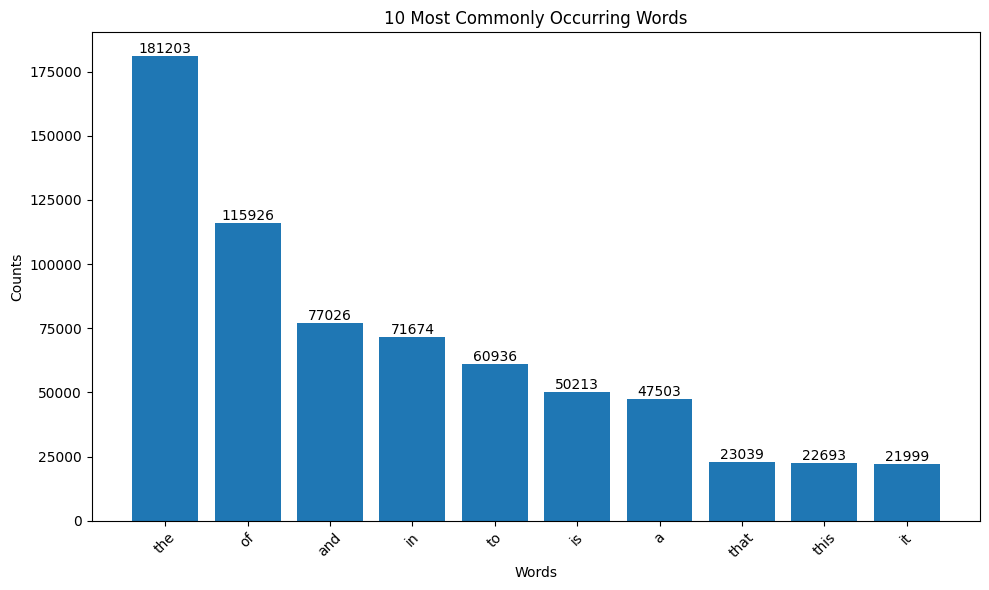

In [ ]:
def remove_special_characters(text):
    special_characters = "!@#$%^&*()_+{}[]|\\;:'\"<>,.?/~`।"
    cleaned_text = ''.join(str(char) for char in str(text) if char not in special_characters)
    return cleaned_text


df['cleaned_english_text'] = df['english_sentence'].apply(remove_special_characters)

english_words = [word for sentence in df['cleaned_english_text'] for word in sentence.lower().split()]

word_counts = {}

for word in english_words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

sorted_words = sorted(word_counts.items(), reverse=True, key=lambda item: item[1])

most_common_words = sorted_words[:10]

words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('10 Most Commonly Occurring Words')
plt.xticks(rotation=45)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()
